# 什么是轮廓?

轮廓可以简单地解释为连接所有连续点（沿着边界），具有相同颜色或强度的曲线。 轮廓是形状分析和物体检测和识别的有用工具。

- 为了更好的准确性，使用二进制图像 所以在找到轮廓之前，应用阈值或canny边缘检测。
- findContours函数修改源图像。 所以如果你想要源图像，即使在找到轮廓之后，已经存储到一些其他的变量。
- 在OpenCV中，查找轮廓就像从黑色背景中找到白色物体。 所以记住，要找到的对象应该是白色的，背景应该是黑色的。
让我们看看如何找到二进制图像的轮廓：

In [1]:
import numpy as np
%matplotlib  inline
import cv2
from scipy import ndimage
import matplotlib.pyplot as plt

In [4]:
src = cv2.cvtColor(cv2.imread('../datas/paper_cutjpg.jpg'),cv2.COLOR_BGR2RGB)
imgray = cv2.imread('../datas/paper_cutjpg.jpg',0)

In [5]:
ret,thresh = cv2.threshold(imgray,127,255,0)

In [6]:
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

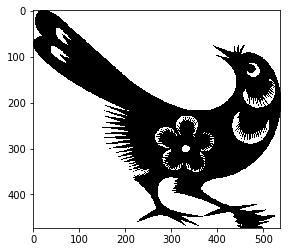

In [7]:
plt.imshow(image,'gray')

# 如何绘制轮廓?

要绘制轮廓，使用cv2.drawContours函数。 它也可以用来绘制任何形状，只要你有它的边界点。 它的第一个参数是源图像，第二个参数是应该作为Python列表传递的轮廓，第三个参数是轮廓的索引（在绘制单个轮廓时有用）绘制所有轮廓，传递-1），剩余的参数是颜色，厚度 等等

绘制图像中的所有轮廓：

img = cv2.drawContours(img, contours, -1, (0,255,0), 3)

绘制第4个轮廓

img = cv2.drawContours(img, contours, 3, (0,255,0), 3)

但大多数时候，下面的方法将是有用的：

cnt = contours[4]

img = cv2.drawContours(img, [cnt], 0, (0,255,0), 3)

最后两个方法是一样的，但是当你向前看时，你会看到最后一个更有用。

In [10]:
img = cv2.drawContours(src, contours, -1, (0,255,0), 3)

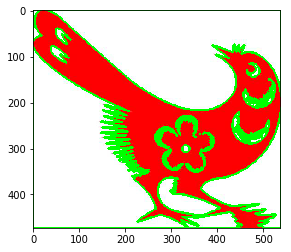

In [11]:
plt.imshow(img)

# 轮廓近似法

这是cv2.findContours函数的第三个参数。它实际上代表什么？

以上，我们告诉轮廓是具有相同强度的形状的边界。它存储形状边界的（x，y）坐标。但是它是否存储所有坐标？这是通过这种轮廓逼近法来规定的。

如果您通过cv2.CHAIN_APPROX_NONE，则会存储所有边界点。但实际上我们需要所有的要点吗？例如，您发现一条直线的轮廓。你需要在线上的所有点来表示这一行吗？不，我们只需要这条线的两个终点。这是cv2.CHAIN_APPROX_SIMPLE所做的。它删除所有冗余点并压缩轮廓，从而节省内存。

在矩形下面的图像展示了这种技术。在轮廓数组的所有坐标上绘制一个圆（用蓝色绘制）。第一张图片显示了我用cv2.CHAIN_APPROX_NONE（734分）得到的积分，第二张图像显示了cv2.CHAIN_APPROX_SIMPLE（只有4分）的图像。看，它节省多少内存！
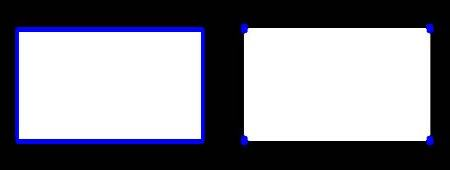

In [12]:
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img = cv2.drawContours(src, contours, -1, (0,255,0), 3) # -1 表示绘制所有轮廓

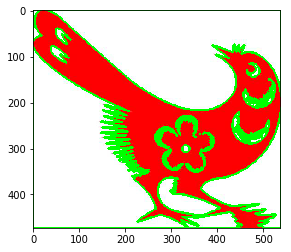

In [13]:
plt.imshow(img)

# 轮廓特征

## 1. Moments

Image moments 可以帮助您计算一些特征，如物体的质心，物体的面积等。查看Image Moments的维基百科页面

函数cv2.moments（）给出了计算的所有moment 值的字典。 见下文：

In [14]:
ret,thresh = cv2.threshold(imgray,127,255,0)
image,contours,hierarchy = cv2.findContours(thresh, 1, 2)

In [15]:
cnt = contours[0]
M = cv2.moments(cnt)
print(M)

{'m00': 2.0, 'm10': 670.0, 'm01': 940.0, 'm20': 224450.3333333333, 'm11': 314900.0, 'm02': 441800.3333333333, 'm30': 75191085.0, 'm21': 105491656.66666667, 'm12': 148003111.66666666, 'm03': 207646470.0, 'mu20': 0.3333333333139308, 'mu11': 0.0, 'mu02': 0.3333333333139308, 'mu30': 1.4901161193847656e-08, 'mu21': 1.4086253941059113e-08, 'mu12': -3.434251993894577e-09, 'mu03': 2.9802322387695312e-08, 'nu20': 0.0833333333284827, 'nu11': 0.0, 'nu02': 0.0833333333284827, 'nu30': 2.634178031930877e-09, 'nu21': 2.4901214208096574e-09, 'nu12': -6.070957182965693e-10, 'nu03': 5.268356063861754e-09}


从这moments，您可以提取有用的数据，如面积，质心等。质心由关系给出， $$C_x = \frac{M_{10}}{M_{00}} and C_y = \frac{M_{01}}{M_{00}}$$

In [16]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(cx,cy)

335 470


## 2. 轮廓区域

In [17]:
area = cv2.contourArea(cnt)
print(area)

2.0


## 3. 轮廓周长

也称为弧长。 可以使用cv2.arcLength（）函数找到它。 第二个参数指定shape是封闭轮廓（如果通过True）或仅仅是曲线。

In [18]:
perimeter = cv2.arcLength(cnt,True)
print(perimeter)

5.656854152679443


## 4. 轮廓近似

它根据我们指定的精度将轮廓形状近似为具有较少数量顶点的另一形状。 这是Douglas-Peucker算法的实现。 检查维基百科页面的算法和演示。

要理解这一点，假设您正在尝试在图像中找到一个正方形，但是由于图像中存在一些问题，您没有获得一个完美的方形，而是一个“坏的形状”（如下图所示）。 现在您可以使用此功能近似形状。 在这里，第二个参数称为epsilon，它是从轮廓到近似轮廓的最大距离。 这是一个精度参数。 需要一个明智的选择来获得正确的输出。

epsilon = 0.1*cv2.arcLength(cnt,True

approx = cv2.approxPolyDP(cnt,epsilon,True)

以下，在第二幅图像中，绿线表示ε= 10％弧长的近似曲线。 epsilon = 1％的弧长显示相同的图像。 第三个参数指定曲线是否闭合。

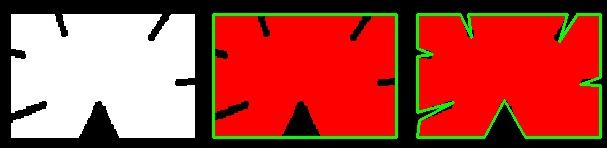

## 5.凸包 Hull

Convex Hull将看起来类似于轮廓近似，但它不是（两者可能在某些情况下提供相同的结果）。 这里，cv2.convexHull（）函数检查一个曲线的凸性缺陷并进行修正。 一般来说，凸曲线是总是凸出的或至少平坦的曲线。 如果内部膨胀，则称为凸面缺陷。 例如，检查下面的图像。 红线显示手的凸包。 双面箭头标记显示凸度缺陷，这是船体与轮廓的局部最大偏差。
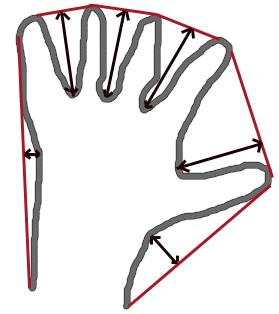

hull = cv2.convexHull(points[, hull[, clockwise[, returnPoints]]
参数细节：

- points是我们传入的轮廓。
- hull是输出，通常我们避免它。
- clockwise顺时针方向标志。 如果为真，输出凸包为顺时针方向。 否则，它是逆时针方向。
- returnPoints：默认情况下为True。 然后它返回船体点的坐标。 如果为False，则返回与船体点对应的轮廓点的索引。
所以为了得到如上图所示的凸包，以下是足够的：

hull = cv2.convexHull(cnt)
但是如果要查找凸性缺陷，则需要传递returnPoints = False。 要理解它，我们将把上面的矩形图像。 首先我发现它的轮廓为cnt。 现在我发现它的凸包具有returnPoints = True，我得到以下值：[[[234 202]]，[[51 202]]，[[51 79]]，[[234 79]]] 矩形点。 现在如果对returnPoints = False做同样的，我得到以下结果：[[129]，[67]，[0]，[142]]。 这些是轮廓中相应点的指标。 例如，检查与第一个结果相同的第一个值：cnt [129] = [[234,202]]（对于其他结果，等等）。

当我们讨论凸性缺陷时，您将再次看到它。


## 6. 检查凸度

有一个函数来检查曲线是否是凸的，cv2.isContourConvex（）。 它只返回是True还是False。 没什么大不了的。

k = cv2.isContourConvex(cnt)

## 7. 边界矩形

有两种类型的边界矩形。

### .a. 直边矩形

它是一个直的矩形，它不考虑对象的旋转。 所以边界矩形的区域不会是最小的。 它由函数cv2.boundingRect（）发现。

令（x，y）为矩形的左上角坐标，（w，h）为其宽度和高度。

x,y,w,h = cv2.boundingRect(cnt)

img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

### 7.b. 旋转矩形

这里，以最小面积绘制边界矩形，因此也考虑旋转。 使用的功能是cv2.minAreaRect（）。 它返回一个Box2D结构，其包含以下detals - （左上角（x，y），（宽度，高度），旋转角度）。 但是要绘制这个矩形，我们需要矩形的四个角。 它是通过函数cv2.boxPoints（）获得的



rect = cv2.minAreaRect(cnt)

box = cv2.boxPoints(rect)

box = np.int0(box)

im = cv2.drawContours(im,[box],0,(0,0,255),2)

两个矩形都显示在单个图像中。 绿色矩形显示正常的边界。 红色矩形是旋转的矩形。
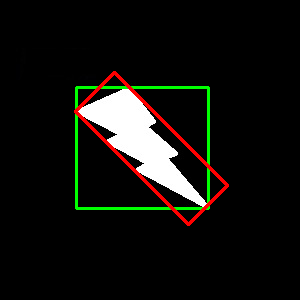

## 8. 最小封闭圈
接下来，我们使用函数cv2.minEnclosingCircle（）找到对象的外接圆。 它是一个圆形，完全覆盖最小面积的物体。

(x,y),radius = cv2.minEnclosingCircle(cnt)

center = (int(x),int(y))

radius = int(radius)

img = cv2.circle(img,center,radius,(0,255,0),2)

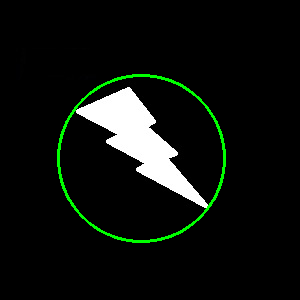

## 9. Fitting一个椭圆

下一个是将一个椭圆适合于一个对象。 它返回旋转的矩形，其中刻有椭圆。

ellipse = cv2.fitEllipse(cnt)

im = cv2.ellipse(im,ellipse,(0,255,0),2)

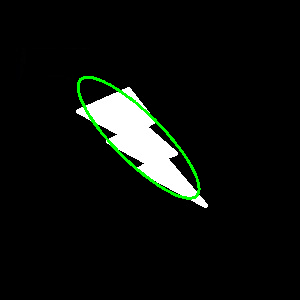

## 10. Fitting一条线

类似地，我们可以将一条线适合一组点。 图像下方包含一组白点。 我们可以近似一条直线。

rows,cols = img.shape[:2]

[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)

lefty = int((-x*vy/vx) + y)

righty = int(((cols-x)*vy/vx)+y)

img = cv2.line(img,(cols-1,righty),(0,lefty),(0,255,0),2)

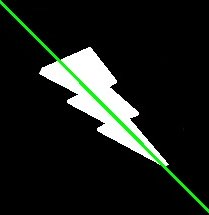

参考：

[1]. https://blog.csdn.net/wc781708249/article/details/78315774